# Zest AI: Data Analysis Exercise



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# "magic" command to make plots show up in the notebook
%matplotlib inline 

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from EDA import *

# 1. Import the Data

In [5]:
acc_df = pd.read_csv('accepted_2007_to_2018Q4.csv')
#rej_df = pd.read_csv('rejected_2007_to_2018Q4.csv')

In [6]:
acc_df.shape

(2260701, 151)

In [7]:
#rej_df.shape

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [10]:
acc_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [11]:
#rej_df.head()

Firstly, lets explore the quality of accepted loans. Therefore, we will be using `acc_df` DataFrame to learn about the different characteristics of the good vs defaulted loans.

# 2. Target Variable

In [12]:
acc_df['loan_status'].value_counts(dropna=False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: loan_status, dtype: int64

Assigning 'Default', 'Charged Off', 'Does not meet the credit policy. Status:Charged Off' `loan_status` as bad loans and 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid' as good loans. Ignore the rest of the categories for now. 

In [13]:
bad_loan_categories = ['Default', 'Charged Off', 'Does not meet the credit policy. Status:Charged Off']
good_loan_categories = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']

In [14]:
acc_df['loan_category'] = np.where(acc_df['loan_status'].isin(bad_loan_categories), 'bad',
                                  np.where(acc_df['loan_status'].isin(good_loan_categories), 'good', 'remove'))

In [15]:
loans = acc_df[~(acc_df['loan_category']=='remove')]

In [16]:
loans.shape

(1348099, 152)

In [17]:
loans['loan_category'].value_counts()

good    1078739
bad      269360
Name: loan_category, dtype: int64

In [18]:
loans['loan_category_numeric'] = np.where(loans['loan_category']=='good',1,0)

# 3. Important Features Selection

Calculating the percentage of missing data

In [19]:
missing_fractions = loans.isnull().mean().sort_values(ascending=False)

In [20]:
missing_fractions.head()

member_id                                     1.000000
next_pymnt_d                                  0.997931
orig_projected_additional_accrued_interest    0.997210
hardship_payoff_balance_amount                0.995730
hardship_amount                               0.995730
dtype: float64

Visualizing the distribution of missing data

Text(0, 0.5, 'Feature count')

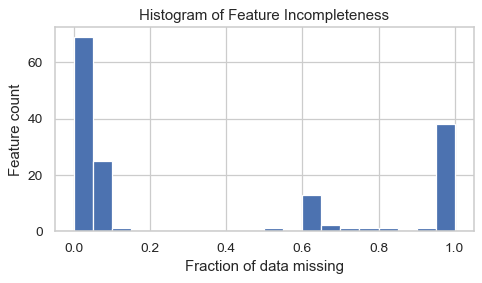

In [21]:
plt.figure(figsize=(6,3), dpi=90)
missing_fractions.plot.hist(bins=20)
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')

Ignore the features with more than 20% missing data to limit the number of features.

In [22]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.2].index))

In [23]:
len(drop_list)

58

Dropping these features

In [24]:
loans.drop(labels=drop_list, axis=1, inplace=True)

In [25]:
loans.shape

(1348099, 95)

# 4. Exploratory Data Analysis

Let's inspect some features individually which I feel are important for determining the loan category, and do the following:

 1. View summary statistics and visualize the data, plotting against the loan category.
 2. Modify the feature to make it useful for modeling, if necessary.

Also, define a function for plotting a variable and comparing with the loan category:

In [26]:
eda = EDA(loans)

In [27]:
categorical_features = list(loans.select_dtypes('object').columns)
#categorical_features

In [28]:
numerical_features = list(loans.select_dtypes('number').columns)
#numerical_features

In [29]:
numerical_features.remove('loan_category_numeric')

Computing Pearson correlation, F-statistic, and  p value of each predictor with the target varaible.

In [30]:
linear_dep = pd.DataFrame()

Pearson correlations:

In [31]:
for col in numerical_features:
    linear_dep.loc[col, 'pearson_corr'] = loans[col].corr(loans['loan_category_numeric'])
    #print(col)
linear_dep['abs_pearson_corr'] = abs(linear_dep['pearson_corr'])

F- Statistic:

In [32]:
from sklearn.feature_selection import f_classif
for col in numerical_features:
    mask = loans[col].notnull()
    (linear_dep.loc[col, 'F'], linear_dep.loc[col, 'p_value']) = f_classif(pd.DataFrame(loans.loc[mask, col]), loans['loan_category_numeric'].loc[mask])
    

Sort the results by the absolute value of the Pearson correlation:

In [33]:
linear_dep.sort_values('abs_pearson_corr', ascending=False, inplace=True)

Reset the index:

In [34]:
linear_dep.reset_index(inplace=True)
linear_dep.rename(columns={'index':'variable'}, inplace=True)

View the results for the top 20 predictors most correlated with loan_category:

In [35]:
linear_dep.head(20)

,variable,pearson_corr,abs_pearson_corr,F,p_value
0,last_fico_range_high,0.667146,0.667146,1.081274e+06,0.0
1,last_fico_range_low,0.575049,0.575049,6.660376e+05,0.0
2,recoveries,-0.504726,0.504726,4.608182e+05,0.0
3,collection_recovery_fee,-0.479063,0.479063,4.015447e+05,0.0
4,total_rec_prncp,0.438928,0.438928,3.216999e+05,0.0
5,last_pymnt_amnt,0.347247,0.347247,1.848420e+05,0.0
6,total_pymnt,0.315305,0.315305,1.488189e+05,0.0
7,total_pymnt_inv,0.314781,0.314781,1.482710e+05,0.0
8,int_rate,-0.258577,0.258577,9.659489e+04,0.0
9,total_rec_late_fee,-0.141104,0.141104,2.738648e+04,0.0


Some of the top correlated features like `recoveries`, `collection_recovery_fee`, etc are features of the defaulted loan, therefore they will not be important to predict the loan status in adavce.

Now view the results for the 20 least correlated predictors:

In [36]:
linear_dep.tail(20)

,variable,pearson_corr,abs_pearson_corr,F,p_value
49,collections_12_mths_ex_med,-0.015981,0.015981,344.328976,7.442476e-77
50,num_bc_sats,-0.014222,0.014222,260.873414,1.121779e-58
51,total_acc,0.011412,0.011412,175.576674,4.505966e-40
52,pct_tl_nvr_dlq,0.010556,0.010556,142.391061,8.019022e-33
53,num_accts_ever_120_pd,-0.010370,0.010370,137.430809,9.743172e-32
54,num_tl_90g_dpd_24m,-0.009887,0.009887,124.931317,5.285080e-29
55,tax_liens,-0.009690,0.009690,126.575274,2.308016e-29
56,out_prncp,-0.008320,0.008320,93.332597,4.427813e-22
57,out_prncp_inv,-0.008320,0.008320,93.332597,4.427813e-22
58,num_il_tl,-0.006382,0.006382,52.053111,5.404930e-13


## 4.1 id

In [37]:
loans['id'].describe()

count     1348099
unique    1348099
top       6291456
freq            1
Name: id, dtype: int64

Each id is unique for a loan

## 4.2 loan_amnt

In [38]:
loans['loan_amnt'].describe()

count    1.348099e+06
mean     1.440900e+04
std      8.716138e+03
min      5.000000e+02
25%      7.975000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

Loan amounts range from 500 dollars to 40,000 dolalrs, with a median of $12,000.

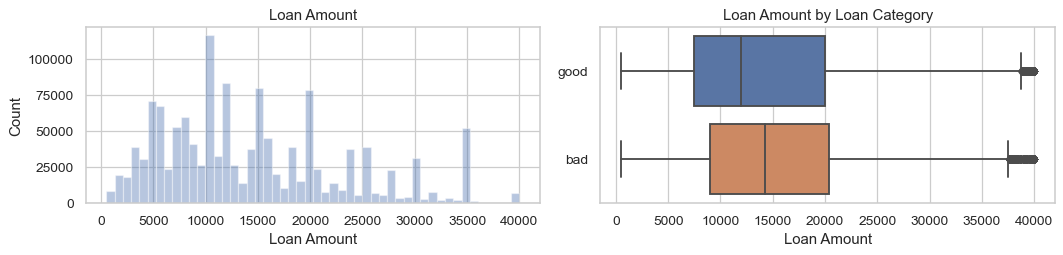

In [39]:
eda.plot_var('loan_amnt', 'Loan Amount', continuous=True)

### Bad laons have higher average Loan Amount. Comparing other statistics below.

In [40]:
loans.groupby('loan_category')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_category,,,,,,,,
bad,269360.0,15547.816955,8814.732243,500.0,9000.0,14300.0,20400.0,40000.0
good,1078739.0,14124.637238,8668.035712,500.0,7500.0,12000.0,20000.0,40000.0


## 4.3 funded_amnt

In [41]:
loans['funded_amnt'].describe()

count    1.348099e+06
mean     1.440019e+04
std      8.712250e+03
min      5.000000e+02
25%      7.950000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: funded_amnt, dtype: float64

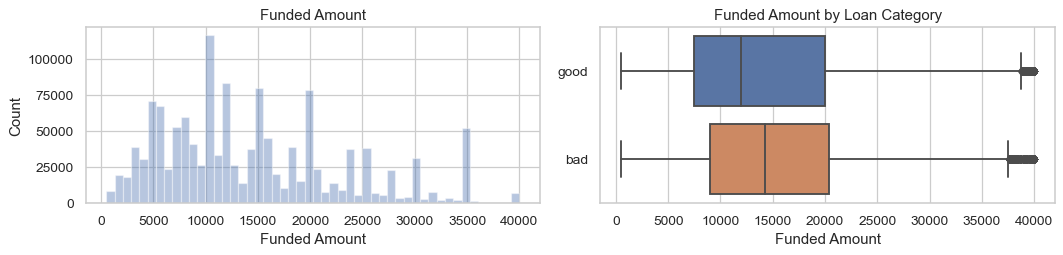

In [42]:
eda.plot_var('funded_amnt', 'Funded Amount', continuous=True)

In [43]:
loans.groupby('loan_category')['funded_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_category,,,,,,,,
bad,269360.0,15539.056560,8811.315479,500.0,9000.0,14250.0,20400.0,40000.0
good,1078739.0,14115.812467,8664.015228,500.0,7500.0,12000.0,20000.0,40000.0


### Funded amount has a very similar characteristics as that of a loan amount. There correlation is also greater than 99.9%. 

In [44]:
np.corrcoef(loans['loan_amnt'], loans['funded_amnt'])

array([[1.        , 0.99954519],
       [0.99954519, 1.        ]])

## 4.4 term

In [45]:
loans['term'].value_counts(dropna=False)

 36 months    1023206
 60 months     324893
Name: term, dtype: int64

In [46]:
loans['term'].value_counts(normalize=True)

 36 months    0.758999
 60 months    0.241001
Name: term, dtype: float64

Compare the bad loans rate by the term of the loan

In [47]:
loans.groupby('term')['loan_category'].value_counts(normalize=True).loc[:,'bad']

term
 36 months    0.160208
 60 months    0.324519
Name: loan_category, dtype: float64

### About 76% of the loans have three-year periods, and the rest have five-year periods. Loans with five-year periods are more than twice as likely to be a bad loan as comapred with three-year periods.

## 4.5 int_rate

In [48]:
loans['int_rate'].describe()

count    1.348099e+06
mean     1.324156e+01
std      4.765685e+00
min      5.310000e+00
25%      9.750000e+00
50%      1.274000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

Interest rates range from 5.31% to 30.99% with a median of 12.74%.

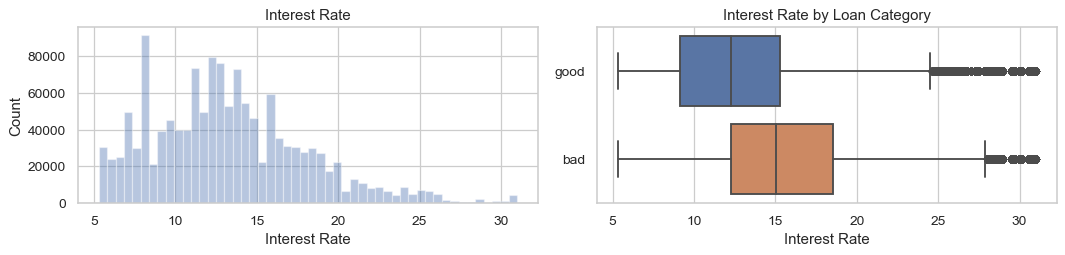

In [49]:
eda.plot_var('int_rate', 'Interest Rate', continuous=True)

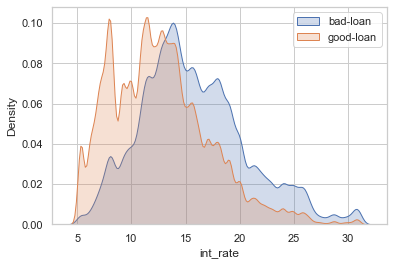

In [50]:
eda.plot_density_plot('int_rate')

### Bad loans tend to have much higher interest rates. Let's compare the summary statistics by loan category:

In [51]:
loans.groupby('loan_category')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_category,,,,,,,,
bad,269360.0,15.707638,4.906016,5.31,12.29,15.05,18.55,30.99
good,1078739.0,12.625786,4.524947,5.31,9.17,12.29,15.31,30.99


## 4.6 installment

In [52]:
loans['installment'].describe()

count    1.348099e+06
mean     4.377778e+02
std      2.614972e+02
min      4.930000e+00
25%      2.482800e+02
50%      3.750400e+02
75%      5.802200e+02
max      1.719830e+03
Name: installment, dtype: float64

### Installments range from $4.93 to $1,719, with a median of $375

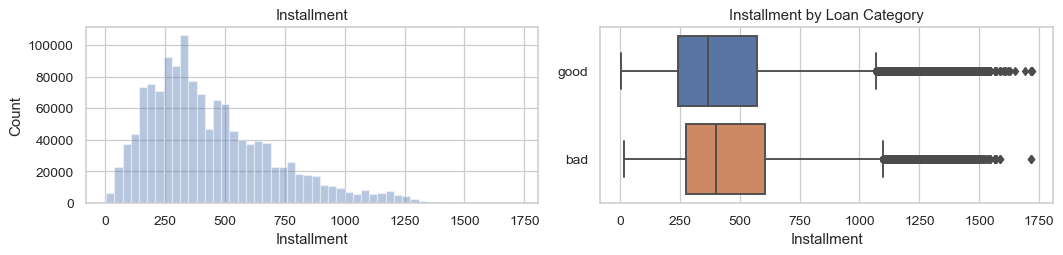

In [53]:
eda.plot_var('installment', 'Installment', continuous=True)

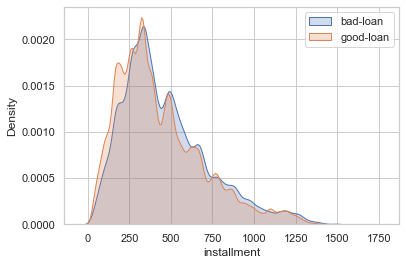

In [54]:
eda.plot_density_plot('installment')

### Bad loans tend to have higher installments. Let's compare the summary statistics by loan category:

In [55]:
loans.groupby('loan_category')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_category,,,,,,,,
bad,269360.0,464.692098,262.793280,15.91,275.07,402.54,604.6575,1717.63
good,1078739.0,431.057382,260.739575,4.93,240.92,367.80,572.8500,1719.83


### Bad Loans have $33 higher installments on average than good loans.

## 4.7 grade/sub-grade

In [56]:
print(sorted(loans['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [57]:
print(sorted(loans['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


The grade is implied by the subgrade, so let's drop the grade column.

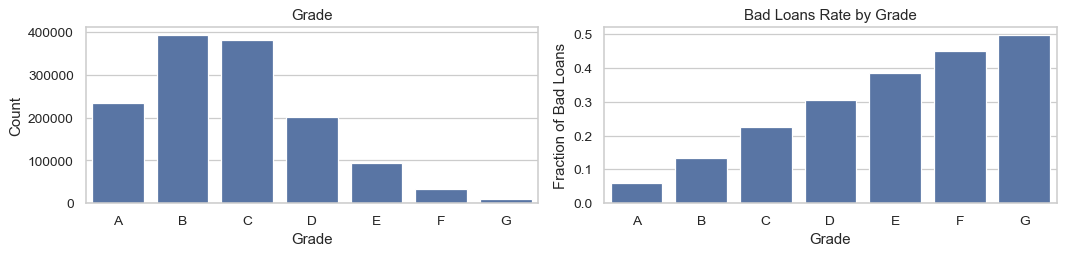

In [58]:
eda.plot_var('grade', 'Grade', continuous=False)

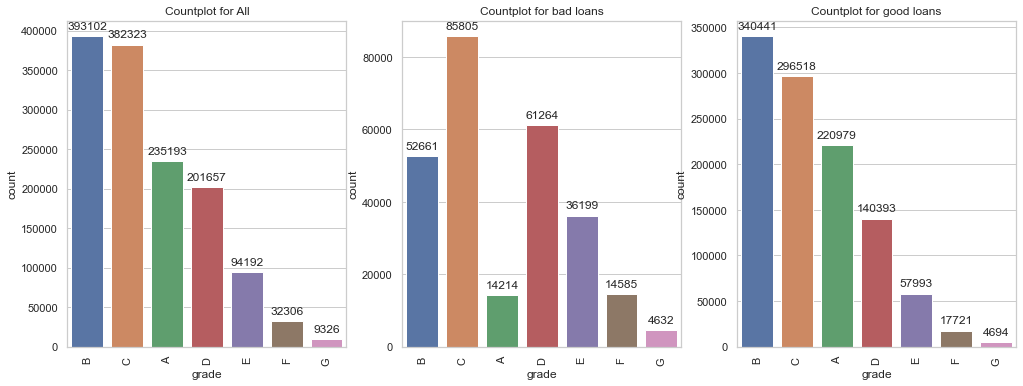

In [59]:
eda.plot_countplot('grade')

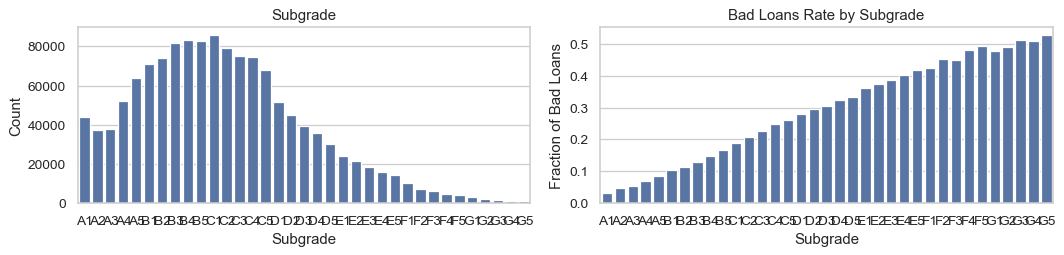

In [60]:
eda.plot_var('sub_grade', 'Subgrade', continuous=False)

### There's a clear trend of higher probability of bad loans as the grade/subgrade worsens.

## 4.8 emp_title and emp_length

In [61]:
loans['emp_title'].describe()

count     1262149
unique     379863
top       Teacher
freq        21268
Name: emp_title, dtype: object

### There are too many distinct employee titles. Lets look at the employment length

In [62]:
loans['emp_length'].value_counts(dropna=False).sort_index()

1 year        88843
10+ years    442679
2 years      122100
3 years      107868
4 years       80763
5 years       84326
6 years       62879
7 years       59724
8 years       60811
9 years       51019
< 1 year     108537
NaN           78550
Name: emp_length, dtype: int64

### Converting 'emp_length' as an integer

In [63]:
loans['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)
loans['emp_length'].replace('< 1 year', '0 years', inplace=True)

In [64]:
def emp_length_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])

In [65]:
loans['emp_length'] = loans['emp_length'].apply(emp_length_to_int)

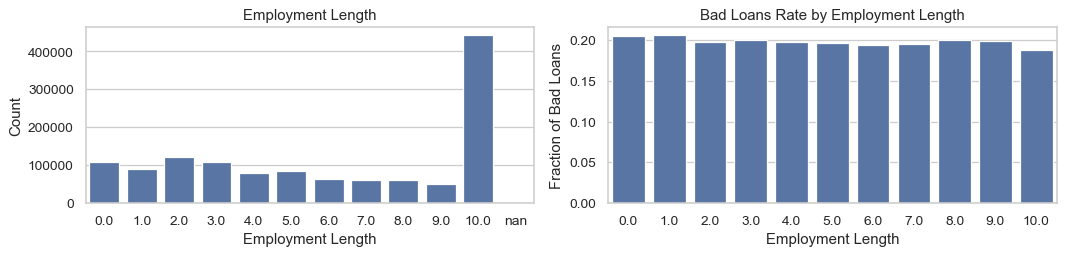

In [66]:
eda.plot_var('emp_length', 'Employment Length', continuous=False)

### The percentage of bad loans seems to be indifferent with varing employment length. There is a small drop od fraction of bad loans with employment length >=10 years. 

## 4.9 home_ownership

In [67]:
loans['home_ownership'].value_counts(dropna=False)

MORTGAGE    666852
RENT        535699
OWN         145027
ANY            286
OTHER          182
NONE            53
Name: home_ownership, dtype: int64

In [68]:
loans['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

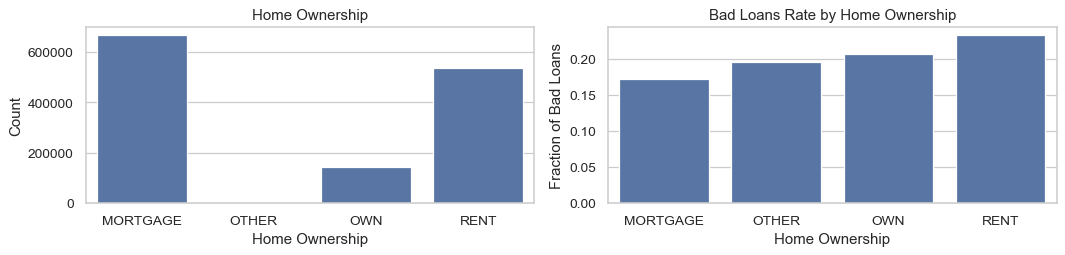

In [69]:
eda.plot_var('home_ownership', 'Home Ownership', continuous=False)

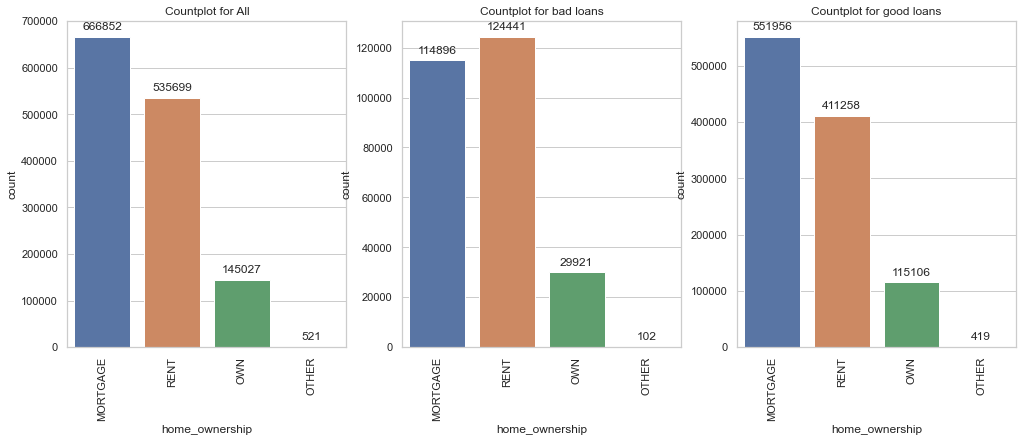

In [70]:
eda.plot_countplot('home_ownership')

### There appear to be large differences in bad loans rates by home ownership status. Renters and homeowners have a higher probability of bad loans. Let's compare the bad-loans rates:

In [71]:
loans.groupby('home_ownership')['loan_category'].value_counts(normalize=True).loc[:,'bad']

home_ownership
MORTGAGE    0.172296
OTHER       0.195777
OWN         0.206313
RENT        0.232296
Name: loan_category, dtype: float64

### Renters are 5% more likely to default on a loan than people with mortgage.

## 4.10 annual_inc

In [72]:
loans['annual_inc'].describe()

count    1.348095e+06
mean     7.623774e+04
std      6.992274e+04
min      0.000000e+00
25%      4.575000e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

### Annual income ranges from $0 to $10,999,200, with a median of $65,000. Because of the large range of incomes, a log transform of the annual income variable is taken.

In [73]:
loans['log_annual_inc'] = loans['annual_inc'].apply(lambda x: np.log10(x+1))

In [74]:
loans['log_annual_inc'].describe()

count    1.348095e+06
mean     4.812679e+00
std      2.478492e-01
min      0.000000e+00
25%      4.660401e+00
50%      4.812920e+00
75%      4.954247e+00
max      7.041361e+00
Name: log_annual_inc, dtype: float64

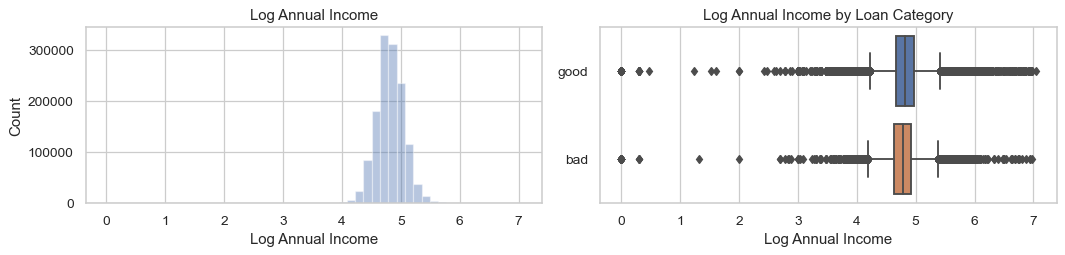

In [75]:
eda.plot_var('log_annual_inc', 'Log Annual Income', continuous=True)

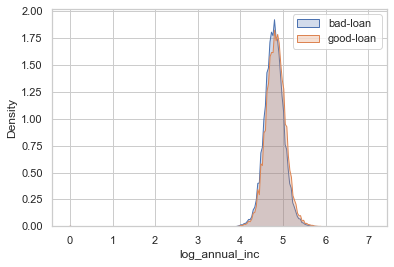

In [76]:
eda.plot_density_plot('log_annual_inc')

### It appears that individuals with higher income are more likely to pay off their loans. Let's compare the summary statistics by loan category:

In [77]:
loans.groupby('loan_category')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_category,,,,,,,,
bad,269360.0,4.781625,0.242174,0.0,4.633479,4.778158,4.929424,6.977724
good,1078735.0,4.820433,0.248642,0.0,4.672107,4.812920,4.968488,7.041361


## 4.11 purpose

In [78]:
loans['purpose'].value_counts()

debt_consolidation    781442
credit_card           295625
home_improvement       87721
other                  78301
major_purchase         29550
medical                15614
small_business         15577
car                    14652
moving                  9526
vacation                9084
house                   7298
wedding                 2350
renewable_energy         936
educational              423
Name: purpose, dtype: int64

In [79]:
loans.groupby('purpose')['loan_category'].value_counts(normalize=True).loc[:,'bad'].sort_values()

purpose
wedding               0.124255
car                   0.147215
credit_card           0.169326
home_improvement      0.177563
major_purchase        0.186058
vacation              0.191986
educational           0.208038
other                 0.210827
debt_consolidation    0.211567
medical               0.218458
house                 0.219101
moving                0.233991
renewable_energy      0.237179
small_business        0.298645
Name: loan_category, dtype: float64

### Notice that only 12% of completed loans for weddings are bad loans, but 30% of completed small business loans are bad loans. The purpose of the loan is an important factor to decide the quality of a loan.

## 4.12 addr_state

In [80]:
loans.groupby('addr_state')['loan_category'].value_counts(normalize=True).loc[:,'bad'].sort_values()

addr_state
DC    0.132281
ME    0.138424
VT    0.139736
OR    0.144275
NH    0.145708
WV    0.155278
CO    0.155367
WA    0.157893
SC    0.162898
WY    0.167464
KS    0.167569
MT    0.169797
UT    0.170761
CT    0.173867
RI    0.178881
IL    0.181203
WI    0.183719
GA    0.184292
ID    0.187943
MA    0.190724
CA    0.196299
AK    0.196557
AZ    0.196592
DE    0.197372
MN    0.197592
TX    0.198425
VA    0.199428
HI    0.202217
MI    0.203070
ND    0.204744
OH    0.205247
NC    0.207952
PA    0.208297
KY    0.210085
NJ    0.211185
SD    0.213357
MD    0.213368
MO    0.213402
NM    0.213637
TN    0.214118
IA    0.214286
IN    0.214305
FL    0.215018
NV    0.219698
NY    0.220506
LA    0.231770
OK    0.234672
AL    0.236347
AR    0.241105
NE    0.252227
MS    0.261107
Name: loan_category, dtype: float64

### There is a significat deviation between the bad loans percentages among different states. The bad loans rate ranges from 13.2% in Washington, DC to 26.1% in Mississippi.

## 4.13 dti

### "A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."

In [81]:
loans['dti'].describe()

count    1.347725e+06
mean     1.827425e+01
std      1.115549e+01
min     -1.000000e+00
25%      1.179000e+01
50%      1.761000e+01
75%      2.405000e+01
max      9.990000e+02
Name: dti, dtype: float64

### Note sure if the values of -1 and 999 make sense...

There are several outliers that mess up our default plots. Plot a histogram for dti less than 60:



Text(0.5, 1.0, 'Debt-to-income Ratio')

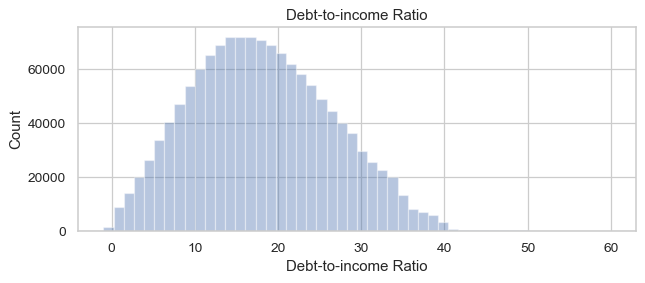

In [82]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(loans.loc[loans['dti'].notnull() & (loans['dti']<60), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

### How many of the dti values are "outliers" (above 60)?

In [83]:
(loans['dti']>=60).sum()

1715

### Very few. Compare the summary statistics by loan status:

In [84]:
loans.groupby('loan_category')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_category,,,,,,,,
bad,269289.0,20.154296,11.825032,0.0,13.54,19.75,26.29,999.0
good,1078436.0,17.804800,10.931614,-1.0,11.42,17.10,23.44,999.0


### Completed loans that are bad tend to have higher debt-to-income ratios.

## 4.14  fico_range_low, fico_range_high

In [85]:
loans[['fico_range_low', 'fico_range_high']].describe()

,fico_range_low,fico_range_high
count,1.348099e+06,1.348099e+06
mean,6.961622e+02,7.001624e+02
std,3.185079e+01,3.185143e+01
min,6.100000e+02,6.140000e+02
25%,6.700000e+02,6.740000e+02
50%,6.900000e+02,6.940000e+02
75%,7.100000e+02,7.140000e+02
max,8.450000e+02,8.500000e+02


### Check the Pearson correlation between these values:

In [86]:
loans[['fico_range_low','fico_range_high']].corr()

,fico_range_low,fico_range_high
fico_range_low,1.0,1.0
fico_range_high,1.0,1.0


### Only need to keep one of the FICO scores. Take the average of the two and call it fico_score:

In [87]:
loans['fico_score'] = 0.5*loans['fico_range_low'] + 0.5*loans['fico_range_high']

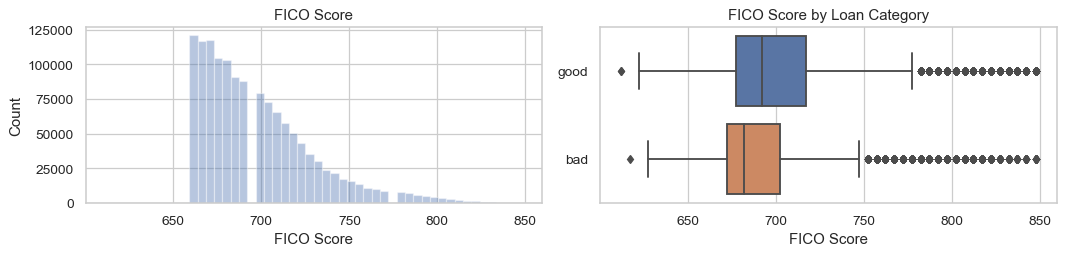

In [88]:
eda.plot_var('fico_score', 'FICO Score', continuous=True)

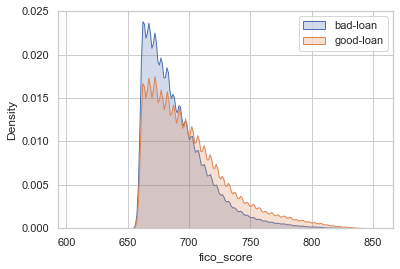

In [89]:
eda.plot_density_plot('fico_score')

### Bad loans have a huge difference between the FICO scores as compared to good loans. The FICO scores of bad loans is much less than that of good loans on average. Compare the summary stats:

In [90]:
loans.groupby('loan_category')['fico_score'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_category,,,,,,,,
bad,269360.0,689.831386,25.956008,617.0,672.0,682.0,702.0,847.5
good,1078739.0,700.242523,32.831822,612.0,677.0,692.0,717.0,847.5


### Bad loans have a FICO score 10 points lower on average.

## 4.15 mort_acc

Data Dictionary: "Number of mortgage accounts."

In [91]:
loans['mort_acc'].describe()

count    1.298069e+06
mean     1.670769e+00
std      2.000441e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      5.100000e+01
Name: mort_acc, dtype: float64

### Not sure how someone can have 51 mortgage accounts...but apparently they do. Check the top 10 values:

In [92]:
loans['mort_acc'].value_counts().head(10)

0.0    523858
1.0    226144
2.0    188943
3.0    139385
4.0     94921
5.0     57633
6.0     32539
7.0     16852
8.0      8378
9.0      4285
Name: mort_acc, dtype: int64

Compare the summary statistics by loan category:

In [93]:
loans.groupby('loan_category')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_category,,,,,,,,
bad,261713.0,1.371006,1.825508,0.0,0.0,1.0,2.0,29.0
good,1036356.0,1.746468,2.035279,0.0,0.0,1.0,3.0,51.0


### Individuals who pay off their loans are more likely to have several mortgage accounts.

## 4.16 verification_status

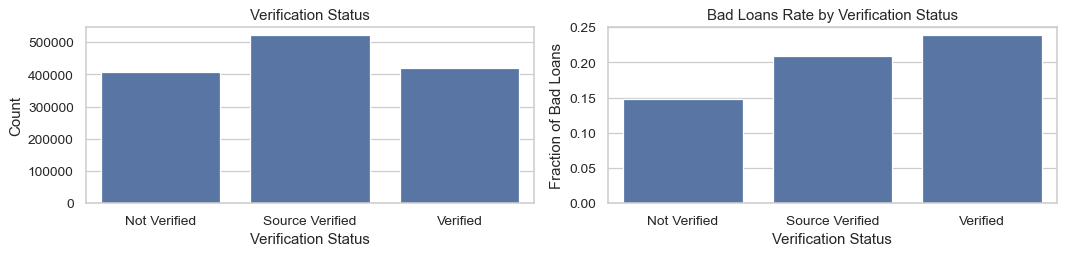

In [94]:
eda.plot_var('verification_status', 'Verification Status', continuous=False)

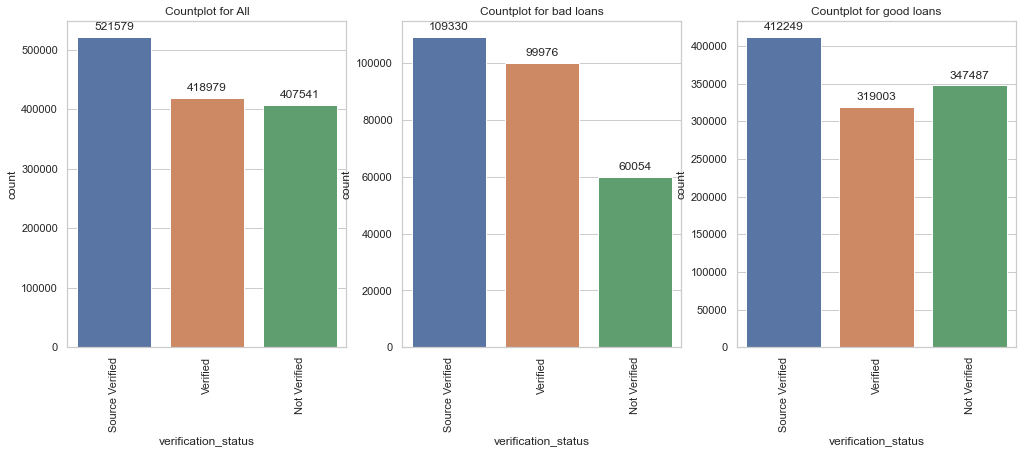

In [95]:
eda.plot_countplot('verification_status')

### Surprisingly, verified loans default more than not verified

# 5. Conclusion

The summary of the key findings is presented below:

1. Loans with five-year periods are more than twice as likely to be a bad loan as comapred with three-year periods.


2. Bad loans tend to have much higher interest rates. On average they have around 3% more interest rate than good loans.


3. Bad Loans have $33 higher installments on average than good loans.


4. As the grade of loan goes from A to G, the default rate increases. This is expected because the grade is decided by Lending Club based on the riskiness of the loan.


5. Loan status does not appear to vary much with employment length on average, except for a small drop in charge-offs for borrowers with over 10 years of employment.


6. There is a large differences in bad loans rates by home ownership status. Renters and homeowners have a higher probability of bad loans. Renters are 5% more likely to default on a loan than people with mortgage.


7. The purpose of the loan is an important factor to decide the quality of a loan. It is observed that only 12% of completed loans for weddings are bad loans, where as 30% of completed small business loans are bad loans. 


8. There is a significat deviation between the bad loans percentages among different states. The bad loans rate ranges from 13.2% in Washington, DC to 26.1% in Mississippi. This means that geographical location of a person is very imprtant factor in deciding the status of the loan as people living together tend to think in a similar way. 


9. Completed loans that are bad tend to have 3% higher debt-to-income ratios.


10. Bad loans have a huge difference between the FICO scores as compared to good loans. The FICO scores of bad loans is 10 points than that of good loans on average.


11. Individuals who pay off their loans are more likely to have several mortgage accounts.


12. Surprisingly, verified loans default more than not verified



# Miscellaneous

In [96]:
def categorise_loan(x):
    return x//5000

In [97]:
loans['loan_amt_category'] = loans['loan_amnt'].apply(categorise_loan)

In [98]:
dd = loans.groupby('loan_amt_category').mean()[['loan_category_numeric']]

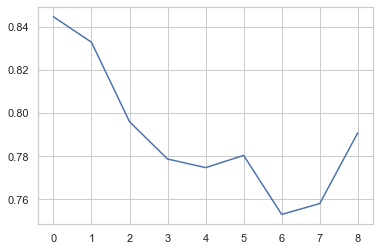

In [99]:
plt.plot(dd)

In [100]:
loans['loan_amt_category'].value_counts()

1.0    323792
2.0    313828
3.0    214111
4.0    169422
0.0    133889
5.0     82855
7.0     53704
6.0     49751
8.0      6747
Name: loan_amt_category, dtype: int64